In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [3]:
!rm -rf ~/.kaggle
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

'rm' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"

In [6]:
!kaggle datasets download -d hojjatk/mnist-dataset
!unzip mnist-dataset.zip -d mnist_data

'kaggle' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find either mnist-dataset.zip or mnist-dataset.zip.zip.
unzip:  cannot find either mnist-dataset.zip or mnist-dataset.zip.zip.


In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape for Conv2D
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# add channel dim
x_train = np.expand_dims(x_train, -1) # shape (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1)

# one-hot labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(x_train.shape, y_train_cat.shape)

(60000, 28, 28, 1) (60000, 10)


In [8]:
def make_model(input_shape=(28,28,1), num_classes=10):
  inp = layers.Input(shape=input_shape)
  
  # Block 1
  x = layers.Conv2D(32, 3, activation='relu', padding='same')(inp)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPool2D(2)(x)
  x = layers.Dropout(0.25)(x)

  # Block 2
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPool2D(2)(x)
  x = layers.Dropout(0.25)(x)

  # Block 3 - Additional depth for better feature extraction
  x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPool2D(2)(x)
  x = layers.Dropout(0.3)(x)

  # Dense layers with better regularization
  x = layers.Flatten()(x)
  x = layers.Dense(256, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.5)(x)
  
  x = layers.Dense(128, activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.Dropout(0.3)(x)
  
  out = layers.Dense(num_classes, activation='softmax')(x)

  model = models.Model(inp, out)
  return model

model = make_model()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,02

 Total params: 619,114 (2.36 MB)

 Trainable params: 617,450 (2.36 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
# Enable mixed precision training for faster GPU training
from tensorflow.keras import mixed_precision

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

print(f"Mixed precision policy: {policy.name}")
print(f"Compute dtype: {policy.compute_dtype}")
print(f"Variable dtype: {policy.variable_dtype}")

# Compile model with optimizer and loss
model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy']
)

# callbacks: checkpoint to Drive
drive_path = '/content/drive/MyDrive/mnist_models'
os.makedirs(drive_path, exist_ok=True)
checkpoint_path = os.path.join(drive_path, 'mnist_cnn_best.keras')

callbacks = [
EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, min_lr=1e-7, verbose=1),
ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1)
]

Mixed precision policy: mixed_float16
Compute dtype: float16
Variable dtype: float32


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
rotation_range=15,
width_shift_range=0.1,
height_shift_range=0.1,
zoom_range=0.15,
shear_range=0.1
)

batch_size = 64
epochs = 30

train_gen = datagen.flow(x_train, y_train_cat, batch_size=batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

history = model.fit(
train_gen,
steps_per_epoch=steps_per_epoch,
epochs=epochs,
validation_data=(x_test, y_test_cat),
callbacks=callbacks,
verbose=1
)

Epoch 1/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7154 - loss: 0.9126
Epoch 1: val_loss improved from None to 0.04008, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5

Epoch 1: val_loss improved from None to 0.04008, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5


937/937 ━━━━━━━━━━━━━━━━━━━━ 50s 49ms/step - accuracy: 0.8642 - loss: 0.4341 - val_accuracy: 0.9875 - val_loss: 0.0401 - learning_rate: 0.0010
Epoch 2/30
Epoch 2/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 44s 48ms/step - accuracy: 0.9688 - loss: 0.0940

c:\Users\MAHADEV\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.04008 to 0.03972, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.0940 - val_accuracy: 0.9872 - val_loss: 0.0397 - learning_rate: 0.0010
Epoch 3/30
Epoch 3/30
936/937 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9582 - loss: 0.1400
Epoch 3: val_loss improved from 0.03972 to 0.03065, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5

Epoch 3: val_loss improved from 0.03972 to 0.03065, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5


937/937 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9631 - loss: 0.1240 - val_accuracy: 0.9905 - val_loss: 0.0307 - learning_rate: 0.0010
Epoch 4/30
Epoch 4/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9688 - loss: 0.0508
Epoch 4: val_loss did not improve from 0.03065
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.0508 - val_accuracy: 0.9900 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 5/30

Epoch 4: val_loss did not improve from 0.03065
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9688 - loss: 0.0508 - val_accuracy: 0.9900 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 5/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9728 - loss: 0.0914
Epoch 5: val_loss improved from 0.03065 to 0.02236, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5

Epoch 5: val_loss improved from 0.03065 to 0.02236, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5


937/937 ━━━━━━━━━━━━━━━━━━━━ 49s 52ms/step - accuracy: 0.9737 - loss: 0.0879 - val_accuracy: 0.9925 - val_loss: 0.0224 - learning_rate: 0.0010
Epoch 6/30
Epoch 6/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9844 - loss: 0.0894
Epoch 6: val_loss improved from 0.02236 to 0.02229, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5

Epoch 6: val_loss improved from 0.02236 to 0.02229, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9844 - loss: 0.0894 - val_accuracy: 0.9925 - val_loss: 0.0223 - learning_rate: 0.0010
Epoch 7/30
Epoch 7/30
936/937 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9766 - loss: 0.0794
Epoch 7: val_loss did not improve from 0.02229
937/937 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9768 - loss: 0.0772 - val_accuracy: 0.9879 - val_loss: 0.0382 - learning_rate: 0.0010
Epoch 8/30

Epoch 7: val_loss did not improve from 0.02229
937/937 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9768 - loss: 0.0772 - val_accuracy: 0.9879 - val_loss: 0.0382 - learning_rate: 0.0010
Epoch 8/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 40s 43ms/step - accuracy: 0.9531 - loss: 0.1435
Epoch 8: val_loss did not improve from 0.02229
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9531 - loss: 0.1435 - val_accuracy: 0.9881 - val_loss: 0.0381 - learning_rate: 0.0010
Epoch 9/30

Epoch 8: val_loss did not improve from 0.02229
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2m

937/937 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9804 - loss: 0.0662 - val_accuracy: 0.9933 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 10/30
Epoch 10/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 43s 47ms/step - accuracy: 1.0000 - loss: 0.0206
Epoch 10: val_loss did not improve from 0.02207
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.9928 - val_loss: 0.0226 - learning_rate: 0.0010
Epoch 11/30

Epoch 10: val_loss did not improve from 0.02207
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0206 - val_accuracy: 0.9928 - val_loss: 0.0226 - learning_rate: 0.0010
Epoch 11/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.9806 - loss: 0.0641
Epoch 11: val_loss did not improve from 0.02207
937/937 ━━━━━━━━━━━━━━━━━━━━ 48s 51ms/step - accuracy: 0.9809 - loss: 0.0639 - val_accuracy: 0.9913 - val_loss: 0.0288 - learning_rate: 0.0010
Epoch 12/30

Epoch 11: val_loss did not improve from 0.02207
937/937 ━━━━━━━━━━━━━━━━━

937/937 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9878 - loss: 0.0429 - val_accuracy: 0.9942 - val_loss: 0.0188 - learning_rate: 5.0000e-04
Epoch 16/30
Epoch 16/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 1.0000 - loss: 9.3951e-04
Epoch 16: val_loss did not improve from 0.01881
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 9.3951e-04 - val_accuracy: 0.9941 - val_loss: 0.0190 - learning_rate: 5.0000e-04
Epoch 17/30

Epoch 16: val_loss did not improve from 0.01881
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 9.3951e-04 - val_accuracy: 0.9941 - val_loss: 0.0190 - learning_rate: 5.0000e-04
Epoch 17/30
936/937 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9881 - loss: 0.0395
Epoch 17: val_loss improved from 0.01881 to 0.01352, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5

Epoch 17: val_loss improved from 0.01881 to 0.01352, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5


937/937 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9880 - loss: 0.0409 - val_accuracy: 0.9956 - val_loss: 0.0135 - learning_rate: 5.0000e-04
Epoch 18/30
Epoch 18/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 44s 47ms/step - accuracy: 1.0000 - loss: 0.0059
Epoch 18: val_loss improved from 0.01352 to 0.01347, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5

Epoch 18: val_loss improved from 0.01352 to 0.01347, saving model to /content/drive/MyDrive/mnist_models\mnist_cnn_best.h5


937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 0.9956 - val_loss: 0.0135 - learning_rate: 5.0000e-04
Epoch 19/30
Epoch 19/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9885 - loss: 0.0385
Epoch 19: val_loss did not improve from 0.01347
937/937 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9889 - loss: 0.0381 - val_accuracy: 0.9949 - val_loss: 0.0168 - learning_rate: 5.0000e-04
Epoch 20/30

Epoch 19: val_loss did not improve from 0.01347
937/937 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9889 - loss: 0.0381 - val_accuracy: 0.9949 - val_loss: 0.0168 - learning_rate: 5.0000e-04
Epoch 20/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 1.0000 - loss: 0.0040
Epoch 20: val_loss did not improve from 0.01347
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 0.9948 - val_loss: 0.0169 - learning_rate: 5.0000e-04
Epoch 21/30

Epoch 20: val_loss did not improve from 0.01347
937/937 ━

937/937 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.9919 - loss: 0.0276 - val_accuracy: 0.9963 - val_loss: 0.0115 - learning_rate: 2.5000e-04
Epoch 26/30
Epoch 26/30
  1/937 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.9844 - loss: 0.0186
Epoch 26: val_loss did not improve from 0.01155
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9844 - loss: 0.0186 - val_accuracy: 0.9964 - val_loss: 0.0116 - learning_rate: 2.5000e-04
Epoch 27/30

Epoch 26: val_loss did not improve from 0.01155
937/937 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9844 - loss: 0.0186 - val_accuracy: 0.9964 - val_loss: 0.0116 - learning_rate: 2.5000e-04
Epoch 27/30
937/937 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.9920 - loss: 0.0261
Epoch 27: val_loss did not improve from 0.01155
937/937 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9921 - loss: 0.0259 - val_accuracy: 0.9956 - val_loss: 0.0126 - learning_rate: 2.5000e-04
Epoch 28/30

Epoch 27: val_loss did not improve from 0.01155
937/937 ━

Test loss: 0.0115 Test acc: 0.9963
Saved model to /content/drive/MyDrive/mnist_models\mnist_cnn.keras


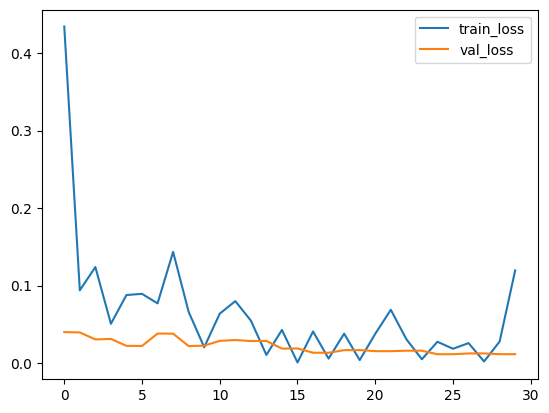

In [26]:
loss, acc = model.evaluate(x_test, y_test_cat, verbose=0)
print(f'Test loss: {loss:.4f} Test acc: {acc:.4f}')

final_path = os.path.join(drive_path, 'mnist_cnn.keras')
model.save(final_path)
print('Saved model to', final_path)

import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend(); plt.show()